In [1]:
import numpy as np
import pandas as pd
import gzip
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def showImage(data):
    some_article = data    # selecting the image
    some_article_image = some_article.reshape(28, 28)
    plt.imshow(some_article_image,cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

In [3]:
filePath_train_set = '/cxldata/datasets/project/mnist/train-images-idx3-ubyte.gz'
filePath_train_label = '/cxldata/datasets/project/mnist/train-labels-idx1-ubyte.gz'
filePath_test_set = '/cxldata/datasets/project/mnist/t10k-images-idx3-ubyte.gz'
filePath_test_label = '/cxldata/datasets/project/mnist/t10k-labels-idx1-ubyte.gz'

In [4]:
with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

In [5]:
X_train, y_train, X_test, y_test = trainSet, trainLabel, testSet, testLabel

In [6]:
# Explore Data

In [7]:
print("X_train - ", X_train.shape)
print("y_train - ", y_train.shape)
print("X_test - ", X_test.shape)
print("y_test - ", y_test.shape)

X_train -  (60000, 784)
y_train -  (60000,)
X_test -  (10000, 784)
y_test -  (10000,)


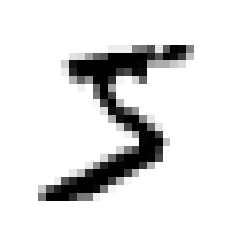

In [8]:
showImage(X_train[0])

In [9]:
y_train[0]

5

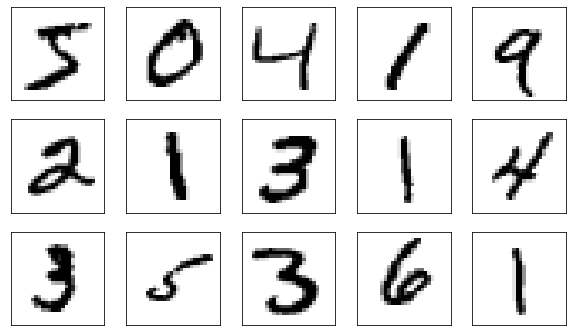

In [10]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    array_image = X_train[i].reshape(28, 28)
    plt.imshow(array_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.show()

In [11]:
np.random.seed(42)

In [12]:
shuffle_index = np.random.permutation(60000)

In [13]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [17]:
# Add Noise to the Data

In [19]:
import numpy.random as rnd

In [21]:
noise_train = rnd.randint(0, 100, (len(X_train), 784))    # (start_value, end_value, size(row x col))
X_train_mod = X_train + noise_train

noise_test = rnd.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise_test

y_train_mod = X_train
y_test_mod = X_test

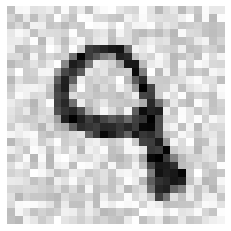

In [25]:
showImage(X_test_mod[4000])

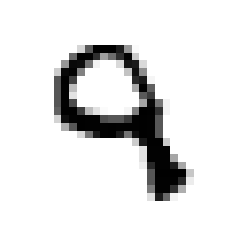

In [27]:
showImage(y_test_mod[4000])

In [30]:
# Train KNN Classifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn_clf = KNeighborsClassifier()

In [33]:
knn_clf.fit(X_train_mod,y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
clean_digit = knn_clf.predict([X_test_mod[5000]])

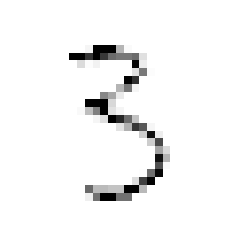

In [37]:
showImage(clean_digit)

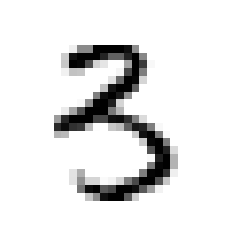

In [38]:
showImage(y_test_mod[5000])